# Project 3: Some useful FFT commands -- MCEN 1030

In [2]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
# from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import stft, istft
import matplotlib.pyplot as plt

## Obtain data from a WAV file

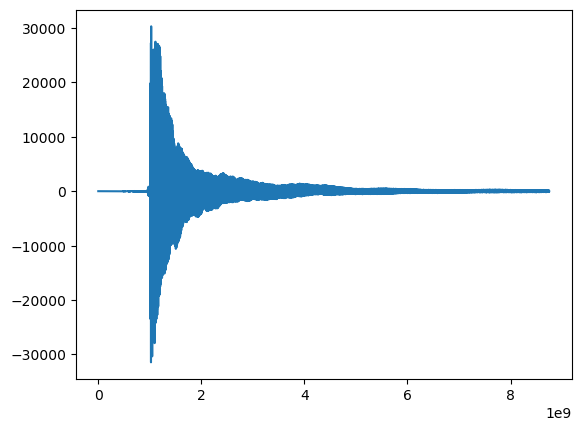

In [4]:
sample_rate, audio_data = wavfile.read('bwomrg.wav') # creates numpy array from a wav file

audio_data=np.mean(audio_data, axis=1) # if wav file is stereo (left and right speaker different), collapses to mono (left=right)

t_audio=sample_rate*np.arange(0,len(audio_data))

plt.plot(t_audio,audio_data)
plt.show()

Play wave file:

In [6]:
Audio(audio_data, rate=sample_rate)

## "Short-time Fourier Transform"

The "Short-Time Fourier Transform" decomposes the signal into its frequency content over many small time intervals within the data set.

/var/folders/cd/wc1c5dmn6c38w61k6g6skb9r0000gn/T/ipykernel_50353/695492558.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(power), shading='gouraud', cmap='viridis')


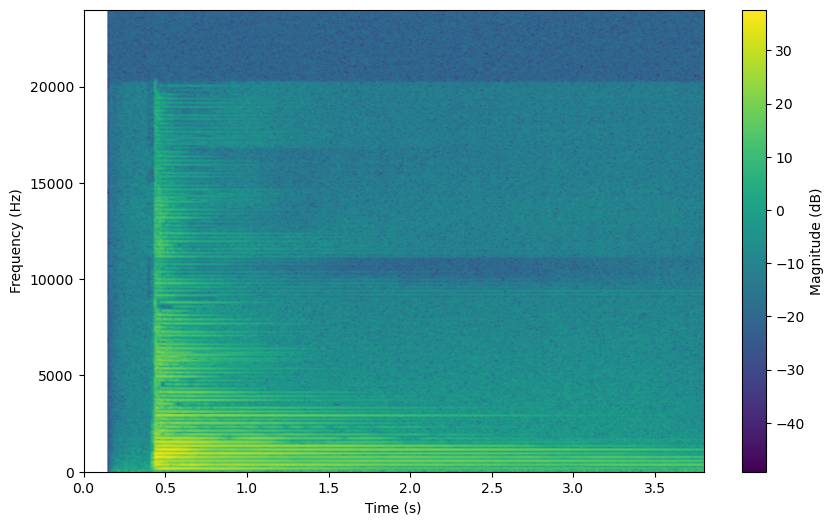

In [8]:
window_size = 1024 # over what interval we do each frequency decomposition
noverlap = 512     # the windows can overlap
nfft = 1024        # number of points in transform not necessary here since it matches window_size
frequencies, times, y = stft(audio_data, fs=sample_rate, nperseg=window_size, noverlap=noverlap, nfft=nfft)
power= np.abs(y)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(power), shading='gouraud', cmap='viridis')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

In [9]:
## Inverse STFT
_, audio_data_inversed=istft(y)
Audio(audio_data_inversed, rate=sample_rate)